In [2]:
import kagglehub
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("piterfm/paris-2024-olympic-summer-games")

print("Path to dataset files:", path)

Path to dataset files: /Users/brittope/.cache/kagglehub/datasets/piterfm/paris-2024-olympic-summer-games/versions/27


In [4]:
# prompt: Liste os arquivos contidos em path.

print(os.listdir(path))

['venues.csv', 'teams.csv', 'athletes.csv', 'nocs.csv', 'medallists.csv', 'technical_officials.csv', 'medals_total.csv', 'coaches.csv', 'schedules.csv', 'results', 'torch_route.csv', 'medals.csv', 'events.csv', 'schedules_preliminary.csv']


In [5]:
medals_total_df = pd.read_csv(os.path.join(path, "medals_total.csv"))
medals_total_df.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [6]:
athletes_df = pd.read_csv(os.path.join(path, "athletes.csv"))
athletes_df.head()

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,True,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,True,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,True,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
athletes_per_country_df = athletes_df['country_code'].value_counts()
athletes_per_country_df = athletes_per_country_df.reset_index()
athletes_per_country_df.rename(columns={'count' : 'athlete_count'}, inplace = True)
athletes_per_country_df.head()

,country_code,athlete_count
0,USA,619
1,FRA,601
2,AUS,475
3,GER,457
4,JPN,431


In [8]:
pop_df = pd.read_csv(("../DataFrames/population.csv"), skiprows=3)
gdp_df = pd.read_csv(("../DataFrames/GDP.csv"), skiprows=3)
gdp_per_capita_df = pd.read_csv(("../Dataframes/GDPPCap.csv"), skiprows=3)
area_df = pd.read_csv(("../DataFrames/totalArea.csv"), skiprows=3)

In [9]:
area_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,180.0,180.0,180.0,180.0,180.0,...,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,NaN,NaN
1,Africa Eastern and Southern,AFE,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,15106741.0,15106741.0,15106741.0,15106741.0,15106741.0,...,1.516206e+07,1.516204e+07,1.516204e+07,1.516204e+07,1.516205e+07,1.516201e+07,1.516201e+07,1.516201e+07,NaN,NaN
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,652860.0,652860.0,652860.0,652860.0,652860.0,...,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,NaN,NaN
3,Africa Western and Central,AFW,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,9166270.0,9166270.0,9166270.0,9166270.0,9166270.0,...,9.166270e+06,9.166270e+06,9.166270e+06,9.166270e+06,9.166243e+06,9.166243e+06,9.166243e+06,9.166243e+06,NaN,NaN
4,Angola,AGO,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,...,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,NaN,NaN


In [10]:
pop_df.rename(columns={"2023": "population"}, inplace=True)
gdp_df.rename(columns={"2023": "GDP"}, inplace=True)
gdp_per_capita_df.rename(columns={"2023": "GDP_per_capita"}, inplace=True)
area_df.rename(columns={"2022": "area"}, inplace=True)

In [11]:
pop_df = pop_df[["Country Name", "Country Code", "population"]]
gdp_df = gdp_df[["Country Code", "GDP"]]
gdp_per_capita_df = gdp_per_capita_df[["Country Code", "GDP_per_capita"]]
area_df = area_df[["Country Code", "area"]]

In [12]:
medals_total_df.rename(columns={"country_code": "Country Code"}, inplace=True)
athletes_per_country_df.rename(columns={"country_code": "Country Code"}, inplace=True)

In [13]:
# Supondo que todos os DataFrames já estejam carregados
medal_full_df = medals_total_df

# Fazendo merge sucessivos com base no 'Country Code'
medal_full_df = medal_full_df.merge(athletes_per_country_df, on='Country Code', how='left')
medal_full_df = medal_full_df.merge(area_df, on='Country Code', how='left')
medal_full_df = medal_full_df.merge(pop_df, on='Country Code', how='left')
medal_full_df = medal_full_df.merge(gdp_per_capita_df, on='Country Code', how='left')
medal_full_df = medal_full_df.merge(gdp_df, on='Country Code', how='left')


# Exibir o resultado
medal_full_df.head()

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,athlete_count,area,Country Name,population,GDP_per_capita,GDP
0,USA,United States,United States of America,40,44,42,126,619,9831510.00,United States,3.349149e+08,82769.412211,2.772071e+13
1,CHN,China,People's Republic of China,40,27,24,91,398,9562910.00,China,1.410710e+09,12614.061742,1.779478e+13
2,JPN,Japan,Japan,20,12,13,45,431,377969.27,Japan,1.245166e+08,33766.526825,4.204495e+12
3,AUS,Australia,Australia,18,19,16,53,475,7741220.00,Australia,2.665895e+07,64820.911789,1.728057e+12
4,FRA,France,France,16,26,22,64,601,549087.37,France,6.828749e+07,44690.934540,3.051832e+12


In [14]:
pd.set_option('display.max_rows', None)

medal_full_df['population_per_medal'] = medal_full_df['population'] / medal_full_df['Total']

#medal_full_df = medal_full_df[medal_full_df['Total'] >= 10]
medal_full_df.sort_values(by='population_per_medal', ascending=True)

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,athlete_count,area,Country Name,population,GDP_per_capita,GDP,population_per_medal
62,DMA,Dominica,Dominica,1,0,0,1,4,7.500000e+02,Dominica,6.651000e+04,9832.996431,6.539926e+08,6.651000e+04
56,CHI,Chile,Chile,1,1,0,2,48,NaN,Channel Islands,1.676910e+05,74589.138023,1.250793e+10,8.384550e+04
57,LCA,Saint Lucia,Saint Lucia,1,1,0,2,4,6.200000e+02,St. Lucia,1.792850e+05,13554.665188,2.430148e+09,8.964250e+04
32,BRN,Bahrain,Bahrain,2,1,1,4,14,5.770000e+03,Brunei Darussalam,4.589490e+05,32962.906512,1.512829e+10,1.147372e+05
10,NZL,New Zealand,New Zealand,10,7,3,20,208,2.677100e+05,New Zealand,5.223100e+06,48280.811417,2.521755e+11,2.611550e+05
43,JAM,Jamaica,Jamaica,1,3,2,6,65,1.099000e+04,Jamaica,2.839786e+06,6839.725039,1.942336e+10,4.732977e+05
3,AUS,Australia,Australia,18,19,16,53,475,7.741220e+06,Australia,2.665895e+07,64820.911789,1.728057e+12,5.029990e+05
13,HUN,Hungary,Hungary,6,7,6,19,177,9.303000e+04,Hungary,9.592186e+06,22141.866980,2.123889e+11,5.048519e+05
84,CPV,Cabo Verde,Cabo Verde,0,0,1,1,7,4.030000e+03,Cabo Verde,5.223310e+05,4850.984158,2.533819e+09,5.223310e+05
23,GEO,Georgia,Georgia,3,3,1,7,28,6.970000e+04,Georgia,3.715483e+06,8283.669602,3.077783e+10,5.307833e+05


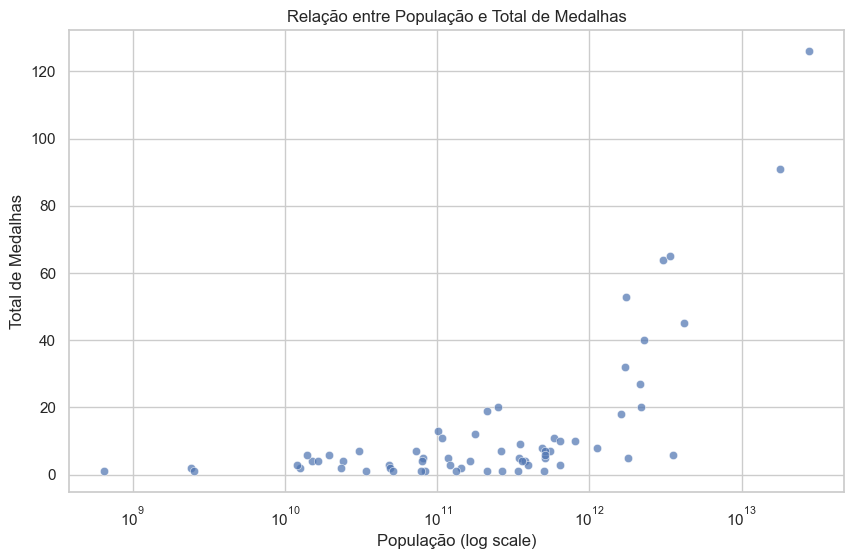

In [15]:
# O QUANTO PIB, PIB PER CAPITA, RENDA E AREA EXPLICAM NÚMERO DE MEDALHAS?

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=medal_full_df, x="GDP", y="Total", alpha=0.7)

# Configurações do gráfico
plt.xscale("log")  # Escala logarítmica para melhor visualização
plt.xlabel("População (log scale)")
plt.ylabel("Total de Medalhas")
plt.title("Relação entre População e Total de Medalhas")
plt.show()

In [16]:
# CORRELAÇÂO DE PEARSON MEDE O QUANTO CADA GRANDE EXPLICA AS MEDALHAS.

import scipy.stats as stats

medal_full_sem_zeros_df = medal_full_df.dropna(subset=["population", "GDP", "area"], inplace=False)
correlation, p_value = stats.pearsonr(medal_full_sem_zeros_df["area"], medal_full_sem_zeros_df["Total"])
print(f"Correlação de Pearson: {correlation:.4f}, p-valor: {p_value:.4f}")

Correlação de Pearson: 0.5622, p-valor: 0.0000


In [17]:
# O BRASIL VAI ABAIXO OU ACIMA DO ESPERADO, DE ACORDO COM SUA POPULAÇÃO?
medal_full_df['population_per_medal'].mean()

# medal_full_df['population_per_medal'].median()

np.float64(13276133.943873063)

In [18]:
medal_full_df[medal_full_df['Country Code'] == 'BRA']

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,athlete_count,area,Country Name,population,GDP_per_capita,GDP,population_per_medal
19,BRA,Brazil,Brazil,3,7,10,20,290,8510417.771,Brazil,211140729.0,10294.866681,2.173666e+12,10557036.45


In [19]:
# O momento que tivemos que tirar population vazia é um BAD SMELL.
# Cadê a Alemanha? Holanda?

medal_full_df[medal_full_df['population'].isna()]

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,athlete_count,area,Country Name,population,GDP_per_capita,GDP,population_per_medal
5,NED,Netherlands,Netherlands,15,7,12,34,290,NaN,NaN,NaN,NaN,NaN,NaN
9,GER,Germany,Germany,12,13,8,33,457,NaN,NaN,NaN,NaN,NaN,NaN
20,IRI,IR Iran,Islamic Republic of Iran,3,6,3,12,41,NaN,NaN,NaN,NaN,NaN,NaN
25,BUL,Bulgaria,Bulgaria,3,1,3,7,46,NaN,NaN,NaN,NaN,NaN,NaN
28,DEN,Denmark,Denmark,2,2,5,9,131,NaN,NaN,NaN,NaN,NaN,NaN
30,CRO,Croatia,Croatia,2,2,3,7,73,NaN,NaN,NaN,NaN,NaN,NaN
33,SLO,Slovenia,Slovenia,2,1,0,3,95,NaN,NaN,NaN,NaN,NaN,NaN
34,TPE,Chinese Taipei,Chinese Taipei,2,0,5,7,60,NaN,NaN,NaN,NaN,NaN,NaN
37,PHI,Philippines,Philippines,2,0,2,4,22,NaN,NaN,NaN,NaN,NaN,NaN
38,ALG,Algeria,Algeria,2,0,1,3,46,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pop_df[pop_df['Country Name'] == 'Germany']
pop_df[pop_df['Country Name'] == 'Switzerland']

,Country Name,Country Code,population
37,Switzerland,CHE,8888093.0


In [21]:
# Procurando países cujo country e Counttry Name não batem

medal_full_df[medal_full_df['country'] != medal_full_df['Country Name']]

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,athlete_count,area,Country Name,population,GDP_per_capita,GDP,population_per_medal
5,NED,Netherlands,Netherlands,15,7,12,34,290,NaN,NaN,NaN,NaN,NaN,NaN
6,GBR,Great Britain,Great Britain,14,22,29,65,343,243610.0,United Kingdom,68350000.0,49463.855462,3.380855e+12,1.051538e+06
7,KOR,Korea,Republic of Korea,13,9,10,32,147,100440.0,"Korea, Rep.",51712619.0,33121.371289,1.712793e+12,1.616019e+06
9,GER,Germany,Germany,12,13,8,33,457,NaN,NaN,NaN,NaN,NaN,NaN
20,IRI,IR Iran,Islamic Republic of Iran,3,6,3,12,41,NaN,NaN,NaN,NaN,NaN,NaN
25,BUL,Bulgaria,Bulgaria,3,1,3,7,46,NaN,NaN,NaN,NaN,NaN,NaN
28,DEN,Denmark,Denmark,2,2,5,9,131,NaN,NaN,NaN,NaN,NaN,NaN
30,CRO,Croatia,Croatia,2,2,3,7,73,NaN,NaN,NaN,NaN,NaN,NaN
32,BRN,Bahrain,Bahrain,2,1,1,4,14,5770.0,Brunei Darussalam,458949.0,32962.906512,1.512829e+10,1.147372e+05
33,SLO,Slovenia,Slovenia,2,1,0,3,95,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Como corrigir?

cc_wrong_names = ['SUI', 'GER', 'POR', ]
cc_correct_names = ['CHE', 'DEU', 'PRT', ]

# Criando um dicionário de mapeamento
correction_dict = dict(zip(cc_wrong_names, cc_correct_names))

# Substituindo os valores errados pelos corretos
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
medals_total_df['Country Code'] = medals_total_df['Country Code'].replace(correction_dict)

In [23]:
medals_total_df[medals_total_df['country'] == 'Switzerland']

,Country Code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
48,CHE,Switzerland,Switzerland,1,2,5,8


Análise Diagnóstica

https://amplitude.com/explore/analytics/what-diagnostic-analytics

NFL vs PIB: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3093296

1) Crie um modelo de regressão que prevê o número de detalhas

2) O Brasil ganhou mais ou menos medalhas do que o modelo prevê?

In [24]:
# Gere código em Python que cria um modelo de regressão linear considerando o dataframe medal_full_df.
# As variáveis independentes são: population, GDP, GDP_per_capita e area.
# A variável dependente é Total.

In [25]:
medal_full_df = medal_full_df.dropna(subset=["population", "GDP", "area"], inplace=False)


In [26]:
medal_full_df.dropna(subset=['athlete_count'], inplace=True)
medal_full_df.dropna(subset=['GDP'], inplace=True)
medal_full_df.dropna(subset=['area'], inplace=True)
medal_full_df.dropna(subset=['GDP_per_capita'], inplace=True)

import pandas as pd
import statsmodels.api as sm

# Definição das variáveis independentes e dependente
#X = medal_full_df[['population', 'GDP', 'GDP_per_capita', 'area']]
X = medal_full_df[['athlete_count', 'GDP', 'GDP_per_capita', 'area']]

y = medal_full_df['Total']

# Adicionando constante para o modelo (intercepto)
X = sm.add_constant(X)

# Criando e ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           4.17e-30
Time:                        17:19:47   Log-Likelihood:                -200.28
No. Observations:                  61   AIC:                             410.6
Df Residuals:                      56   BIC:                             421.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4604      1.291     -0.

In [27]:
# Para cada linha de media_full_df, invoque o modelo e crie uma coluna expected_total

medal_full_df['expected_total'] = model.predict(sm.add_constant(medal_full_df[['athlete_count', 'GDP', 'GDP_per_capita', 'area']]))

medal_full_df['deviation'] = medal_full_df['Total'] - medal_full_df['expected_total']


medal_full_df[['Country Name', 'Country Code', 'Total', 'expected_total', 'deviation']]\
.sort_values(by='deviation')

,Country Name,Country Code,Total,expected_total,deviation
14,Spain,ESP,18,38.108131,-20.108131
71,India,IND,6,18.201733,-12.201733
41,Poland,POL,10,20.928102,-10.928102
53,"Egypt, Arab Rep.",EGY,3,13.520734,-10.520734
52,Argentina,ARG,3,12.089294,-9.089294
65,Mexico,MEX,5,13.067800,-8.067800
24,Belgium,BEL,10,16.264645,-6.264645
19,Brazil,BRA,20,26.175340,-6.175340
18,Ireland,IRL,7,12.840787,-5.840787
0,United States,USA,126,131.408253,-5.408253
